### 3 Self-organized criticality: the Oslo model

This section provides the tasks and questions related to implementing and analyzing the Oslo model of
self-organized criticality. The tasks should be finished till 21.11.2024.

The Oslo rice-pile model is a theoretical model of self-organized criticality (SOC) used to study
the behavior of granular materials and avalanche-like phenomena in a simple, discrete system. It was
introduced as a variation of the sandpile model, and it’s named after the city of Oslo, Norway, where it
was developed.

1. Implement the Oslo model using the following algorithm focusing on slopes ${z_{i}}$:

(a) Initialize the system in arbitrary stable configuration ${z_{i}∈{1, 2}}$;

In [849]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from tqdm import tqdm

In [850]:

height = 4.1

def oslo_model(L, T, z_thresholds=[1, 2]):
    """
    Simulates the Oslo model of self-organized criticality.

    Parameters:
    - L: int, size of the system (number of sites).
    - T: int, number of grain additions (time steps).
    - z_thresholds: list, possible slope thresholds (default is [1, 2]).

    Returns:
    - avalanches: list, size of avalanches during the simulation.
    """

    slopes = np.random.choice(z_thresholds, size=L)  # (a) Initial random slopes in {1, 2}
    thresholds = np.random.choice(z_thresholds, size=L) # (a) Initial random thresholds in {1, 2}
    avalanches = []

    for t in range(T):
        slopes[0] += 1 # (b) Add a grain to the left-most site
        avalanche_size = 0

        # (c) Relaxation process
        while np.any(slopes > thresholds):
            for i in range(L):
                if slopes[i] > thresholds[i]:
                    avalanche_size += 1
                    thresholds[i] = np.random.choice(z_thresholds)  # Assign a new threshold

                    if i == 0:  # Left-most site
                        slopes[i] -= 2
                        slopes[i + 1] += 1
                    elif i == L - 1:  # Right-most site
                        slopes[i] -= 1
                        slopes[i - 1] += 1
                    else:  # Internal sites
                        slopes[i] -= 2
                        slopes[i - 1] += 1
                        slopes[i + 1] += 1

        avalanches.append(avalanche_size)

    return avalanches

2. Plot scaled avalanche size s/smax in function of time t (measured in terms of grain additions). Does
it makes sense to analyze data for small t? Which condition should be satisfied in avalanche size
statistical analysis?

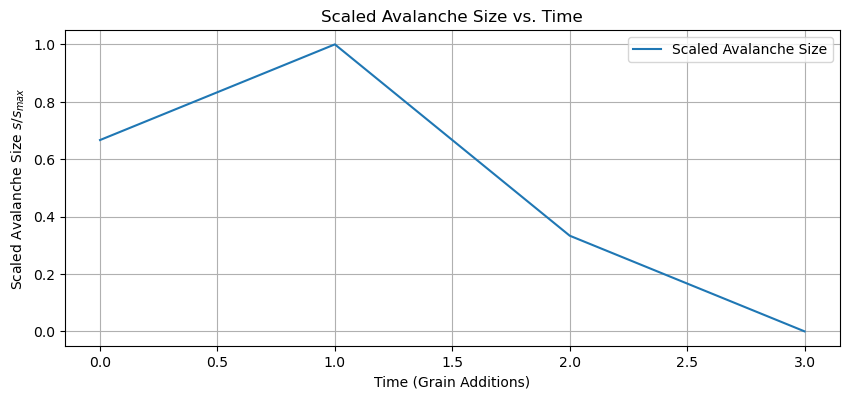

In [851]:
L = 2 # System length
T = 4  # Number of time steps
avalanches = oslo_model(L, T)

# Scaled avalanche sizes
s_max = max(avalanches)
scaled_avalanches = [s / s_max for s in avalanches]

# Plotting
plt.figure(figsize=(10, height))
plt.plot(range(T), scaled_avalanches, label='Scaled Avalanche Size')
plt.xlabel('Time (Grain Additions)')
plt.ylabel('Scaled Avalanche Size $s/s_{max}$')
plt.title('Scaled Avalanche Size vs. Time')
plt.grid(True)
plt.legend()
plt.savefig('avalanche_one.png')
plt.show()

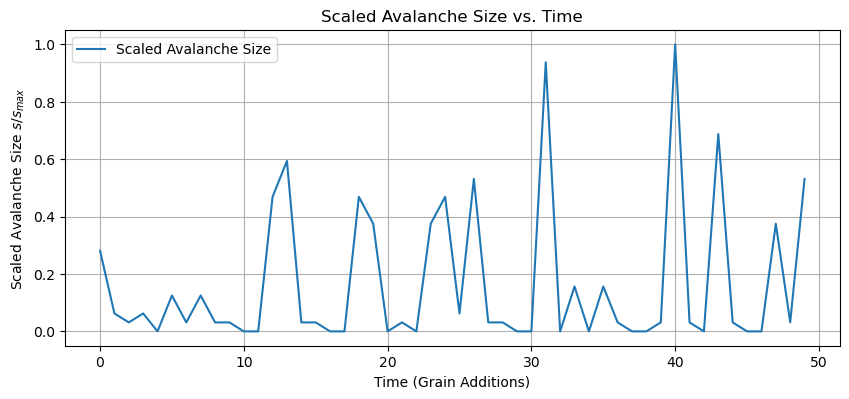

In [852]:
L = 6  # System length
T = 50  # Number of time steps
avalanches = oslo_model(L, T)

# Scaled avalanche sizes
s_max = max(avalanches)
scaled_avalanches = [s / s_max for s in avalanches]

# Plotting
plt.figure(figsize=(10, height))
plt.plot(range(T), scaled_avalanches, label='Scaled Avalanche Size')
plt.xlabel('Time (Grain Additions)')
plt.ylabel('Scaled Avalanche Size $s/s_{max}$')
plt.title('Scaled Avalanche Size vs. Time')
plt.grid(True)
plt.legend()
plt.savefig('avalanche_small.png')
plt.show()

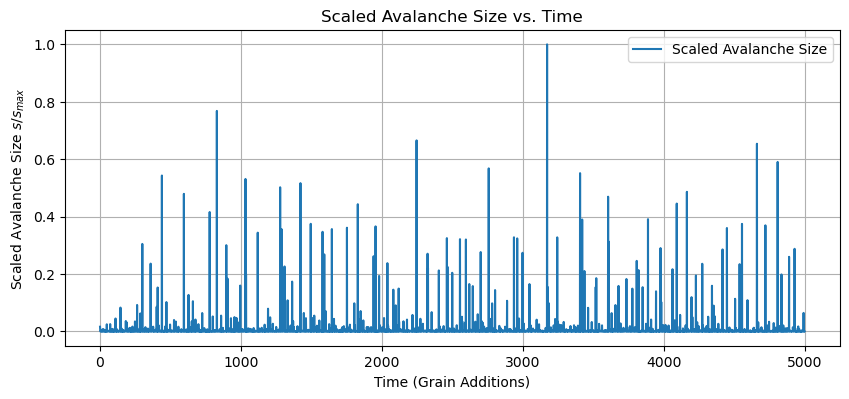

In [853]:
L = 64  # System length
T = 5000  # Number of time steps
avalanches = oslo_model(L, T)

# Scaled avalanche sizes
s_max = max(avalanches)
scaled_avalanches = [s / s_max for s in avalanches]

# Plotting
plt.figure(figsize=(10, height))
plt.plot(range(T), scaled_avalanches, label='Scaled Avalanche Size')
plt.xlabel('Time (Grain Additions)')
plt.ylabel('Scaled Avalanche Size $s/s_{max}$')
plt.title('Scaled Avalanche Size vs. Time')
plt.grid(True)
plt.legend()
plt.savefig('avalanche_big.png')
plt.show()

Does it makes sense to analyze data for small t?

### ANSWER: It doesn’t make sense to analyze data for small t because the system has not reached its critical state yet, and the results will not be representative of the true behavior of the system.

What condition should be satisfied in avalanche size statistical analysis?

#### ANSWER: The system should be in steady state, and you need a large number of grains added to the system for meaningful results (to observe the power-law distribution of avalanche sizes).

3. Plot in log-log scale avalanche size probability P (s, L) with respect to avalanche size s for several
lengths of the system (L should be at least 64). Do you observe power law behavior? Why this
power law breaks for large s?

In [854]:
# def avalanche_probability(avalanches, L_values, Name, height=6, cutoff=10**2):
#     """
#     Computes and plots avalanche size probability P(s, L) and calculates slopes.

#     Parameters:
#     - avalanches: list of lists, avalanches for different system lengths.
#     - L_values: list, system lengths used in the simulation.
#     - Name: str, name for the saved plot file.
#     - height: int, height of the plot figure (default is 6).
#     - cutoff: float, maximum avalanche size to include in the plot (default is 10^2).
#     """
#     plt.figure(figsize=(10, height))

#     for avals, L in tqdm(zip(avalanches, L_values)):
#         if len(avals) == 0:
#             print(f"No data for L={L}, skipping.")
#             continue

#         # Filter data based on cutoff
#         avals = [a for a in avals if a <= cutoff]
#         if len(avals) == 0:
#             print(f"All avalanches for L={L} exceed the cutoff of {cutoff}, skipping.")
#             continue

#         avalanche_sizes, counts = np.unique(avals, return_counts=True)
#         probabilities = counts / sum(counts)

#         # Log-log space for slope calculation
#         log_sizes = np.log10(avalanche_sizes)
#         log_probs = np.log10(probabilities)

#         # Linear regression to calculate slope
#         slope, intercept, r_value, p_value, std_err = linregress(log_sizes, log_probs)

#         # Plotting in log-log scale
#         plt.plot(avalanche_sizes, probabilities, label=f'L={L} (slope={slope:.2f})', marker='o')

#     plt.xscale('log')
#     plt.yscale('log')
#     plt.xlabel('Avalanche Size $s$')
#     plt.ylabel('Probability $P(s, L)$')
#     plt.title('Avalanche Size Probability $P(s, L)$')
#     plt.legend()
#     plt.grid(True, which='both', ls='--')
#     plt.savefig(f'probability_{Name}.png')
#     plt.show()

In [855]:

#  # Working best for now
# from scipy.stats import linregress
# import numpy as np
# import matplotlib.pyplot as plt


# def avalanche_probability(avalanches, L_values, name):
#     """
#     Plot avalanche size probability P(s, L) in log-log scale with points and linear regression.

#     Parameters:
#     - avalanches: list of lists, avalanches for different system lengths.
#     - L_values: list of int, system lengths (should include L >= 64).
#     """
#     plt.figure(figsize=(10, 6))

#     for avals, L in zip(avalanches, L_values):
#         if len(avals) == 0:
#             print(f"No data for L={L}, skipping.")
#             continue

#         # Ensure numeric data
#         avals = [a for a in avals if isinstance(a, (int, float))]

#         # Calculate probabilities
#         avalanche_sizes, counts = np.unique(avals, return_counts=True)
#         probabilities = counts / sum(counts)

#         # Plot points
#         plt.scatter(avalanche_sizes, probabilities, label=f'L={L}', alpha=0.7)

#         # Linear regression in log-log space
#         log_sizes = np.log10(avalanche_sizes)
#         log_probs = np.log10(probabilities)

#         if len(log_sizes) > 1:  # Fit only if sufficient data
#             # Perform linear regression
#             slope, intercept, _, _, _ = linregress(log_sizes, log_probs)

#             # Calculate the fitted regression line in log-log space
#             regression_line = slope * log_sizes + intercept

#             # Convert back to the original scale for plotting
#             fitted_probs = 10 ** regression_line

#             # Plot regression line
#             plt.plot(avalanche_sizes, fitted_probs, label=f'L={L} (Slope={slope:.2f})', linestyle='--')

#     # Configure log-log scale
#     plt.xscale('log')
#     plt.yscale('log')
#     plt.xlabel('Avalanche Size $s$')
#     plt.ylabel('Probability $P(s, L)$')
#     plt.title('Avalanche Size Probability $P(s, L)$ in Log-Log Scale')
#     plt.legend()
#     plt.grid(True, which='both', ls='--')
#     plt.savefig(f'probability_{name}_points_regression.png')
#     plt.show()

#     print("### Observations ###")
#     print("1. Points for avalanche size probability are visible.")
#     print("2. Linear regression lines in log-log scale represent power-law fits.")

In [ ]:
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt


def avalanche_probability(avalanches, L_values, name, min_s=1, max_s=200):
    """
    Plot avalanche size probability P(s, L) in log-log scale with points and linear regression.

    Parameters:
    - avalanches: list of lists, avalanches for different system lengths.
    - L_values: list of int, system lengths.
    - name: str, name for the saved plot file.
    - min_s: float, minimum avalanche size for fitting the power-law.
    - max_s: float, maximum avalanche size for fitting the power-law.
    """
    plt.figure(figsize=(10, height))

    for avals, L in tqdm(zip(avalanches, L_values)):
        if len(avals) == 0:
            print(f"No data for L={L}, skipping.")
            continue

        # Remove non-positive valuesx
        avals = np.array([a for a in avals if a > 0])

        if len(avals) == 0:
            print(f"All data for L={L} are zero or invalid, skipping.")
            continue

        # Calculate probabilities
        avalanche_sizes, counts = np.unique(avals, return_counts=True)
        probabilities = counts / sum(counts)

        # Plot points
        plt.scatter(avalanche_sizes, probabilities, label=f'L={L}', alpha=0.7)

        # Filter for power-law range
        valid_range = (avalanche_sizes >= min_s) & (avalanche_sizes <= max_s)
        filtered_sizes = avalanche_sizes[valid_range]
        filtered_probs = probabilities[valid_range]

        if len(filtered_sizes) > 1:  # Fit only if sufficient data
            # Linear regression in log-log space
            log_sizes = np.log10(filtered_sizes)
            log_probs = np.log10(filtered_probs)
            slope, intercept, _, _, _ = linregress(log_sizes, log_probs)

            # Calculate the fitted regression line in log-log space
            regression_line = slope * log_sizes + intercept

            # Convert back to the original scale for plotting
            fitted_probs = 10 ** regression_line

            # Plot regression line
            plt.plot(filtered_sizes, fitted_probs, label=f'L={L} (Exponent={-slope:.2f})', linestyle='--')

            # Print exponent for verification
            print(f"L={L}: Slope = {slope:.4f}, Exponent = {-slope:.4f}")

    # Configure log-log scale
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Avalanche Size $s$')
    plt.ylabel('Probability $P(s, L)$')
    plt.title('Avalanche Size Probability $P(s, L)$ in Log-Log Scale')
    plt.legend()
    plt.grid(True, which='both', ls='--')

    # Save the plot
    plt.savefig(f'probability_{name}.png')
    plt.show()

DEBUG:matplotlib.ticker:vmin 0.015778827983274537 vmax 0.36240458505320905
DEBUG:matplotlib.ticker:ticklocs array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])
DEBUG:matplotlib.ticker:vmin 0.015778827983274537 vmax 0.36240458505320905
DEBUG:matplotlib.ticker:ticklocs array([2.e-03, 3.e-03, 4.e-03, 5.e-03, 6.e-03, 7.e-03, 8.e-03, 9.e-03,
       2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02, 7.e-02, 8.e-02, 9.e-02,
       2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01])
DEBUG:matplotlib.ticker:vmin 0.015778827983274537 vmax 0.36240458505320905
DEBUG:matplotlib.ticker:ticklocs array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])
DEBUG:matplotlib.ticker:vmin 0.015778827983274537 vmax 0.36240458505320905
DEBUG:matplotlib.ticker:ticklocs array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])
DEBUG:matplotlib.ticker:vmin 0.015778827983274537 vmax 0.36240458505

L=64: Slope = -0.3610, Exponent = 0.3610
L=128: Slope = -0.3480, Exponent = 0.3480
L=256: Slope = -0.4614, Exponent = 0.4614


DEBUG:matplotlib.ticker:vmin 0.7106340507190813 vmax 1304.4688740456238
DEBUG:matplotlib.ticker:ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])
DEBUG:matplotlib.ticker:vmin 0.7106340507190813 vmax 1304.4688740456238
DEBUG:matplotlib.ticker:ticklocs array([2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02, 7.e-02, 8.e-02, 9.e-02,
       2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02,
       2.e+03, 3.e+03, 4.e+03, 5.e+03, 6.e+03, 7.e+03, 8.e+03, 9.e+03,
       2.e+04, 3.e+04, 4.e+04, 5.e+04, 6.e+04, 7.e+04, 8.e+04, 9.e+04,
       2.e+05, 3.e+05, 4.e+05, 5.e+05, 6.e+05, 7.e+05, 8.e+05, 9.e+05])
DEBUG:matplotlib.ticker:vmin 0.7106340507190813 vmax 1304.4688740456238
DEBUG:matplotlib.ticker:ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+0

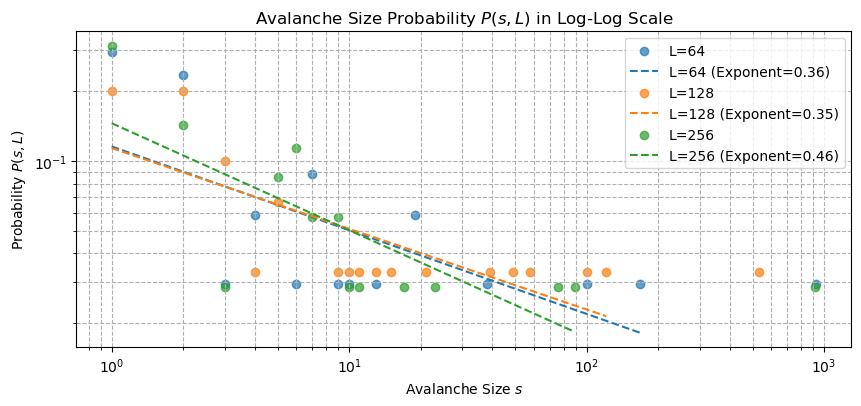

In [857]:
L = 6
T = 50

# Simulations for different system sizes
L_values = [64, 128, 256]
avalanche_data = [oslo_model(L, T) for L in L_values]

# Compute and plot probabilities
avalanche_probability(avalanche_data, L_values, 'one')

DEBUG:matplotlib.ticker:vmin 0.00015508220845902694 vmax 0.42408303990496415
DEBUG:matplotlib.ticker:ticklocs array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])
DEBUG:matplotlib.ticker:vmin 0.00015508220845902694 vmax 0.42408303990496415
DEBUG:matplotlib.ticker:ticklocs array([2.e-05, 3.e-05, 4.e-05, 5.e-05, 6.e-05, 7.e-05, 8.e-05, 9.e-05,
       2.e-04, 3.e-04, 4.e-04, 5.e-04, 6.e-04, 7.e-04, 8.e-04, 9.e-04,
       2.e-03, 3.e-03, 4.e-03, 5.e-03, 6.e-03, 7.e-03, 8.e-03, 9.e-03,
       2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02, 7.e-02, 8.e-02, 9.e-02,
       2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01])
DEBUG:matplotlib.ticker:vmin 0.00015508220845902694 vmax 0.42408303990496415
DEBUG:matplotlib.ticker:ticklocs array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])
DEBUG:matplotlib.ticker:vmin 0.0001550822084

L=64: Slope = -1.3322, Exponent = 1.3322
L=128: Slope = -1.3113, Exponent = 1.3113
L=256: Slope = -1.3060, Exponent = 1.3060


DEBUG:matplotlib.ticker:vmin 0.00015508220845902694 vmax 0.42408303990496415
DEBUG:matplotlib.ticker:ticklocs array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])
DEBUG:matplotlib.ticker:vmin 0.00015508220845902694 vmax 0.42408303990496415
DEBUG:matplotlib.ticker:ticklocs array([2.e-05, 3.e-05, 4.e-05, 5.e-05, 6.e-05, 7.e-05, 8.e-05, 9.e-05,
       2.e-04, 3.e-04, 4.e-04, 5.e-04, 6.e-04, 7.e-04, 8.e-04, 9.e-04,
       2.e-03, 3.e-03, 4.e-03, 5.e-03, 6.e-03, 7.e-03, 8.e-03, 9.e-03,
       2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02, 7.e-02, 8.e-02, 9.e-02,
       2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01])
DEBUG:matplotlib.ticker:vmin 0.00015508220845902694 vmax 0.42408303990496415
DEBUG:matplotlib.ticker:ticklocs array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])
DEBUG:matplotlib.ticker:vmin 0.0001550822084

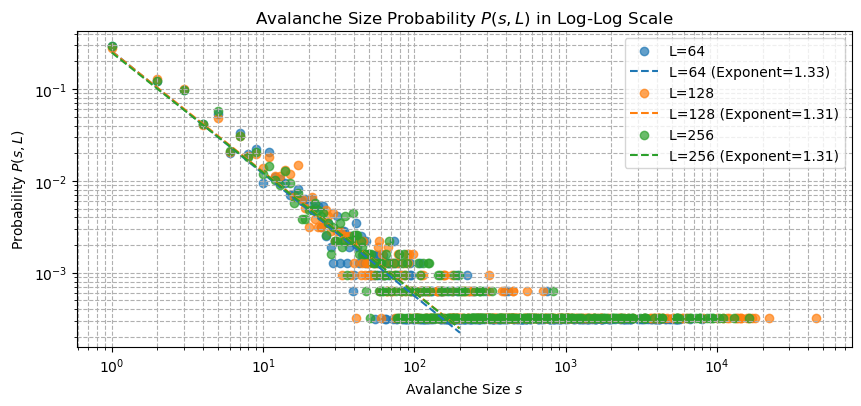

In [858]:
L = 64
T = 5000


# Simulations for different system sizes
L_values = [64, 128, 256]
avalanche_data = [oslo_model(L, T) for L in L_values]

# Compute and plot probabilities
avalanche_probability(avalanche_data, L_values, 'small')

DEBUG:matplotlib.ticker:vmin 1.5540601010582924e-07 vmax 0.9388509019938963
DEBUG:matplotlib.ticker:ticklocs array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,
       1.e+00, 1.e+01])
DEBUG:matplotlib.ticker:vmin 1.5540601010582924e-07 vmax 0.9388509019938963
DEBUG:matplotlib.ticker:ticklocs array([2.e-08, 3.e-08, 4.e-08, 5.e-08, 6.e-08, 7.e-08, 8.e-08, 9.e-08,
       2.e-07, 3.e-07, 4.e-07, 5.e-07, 6.e-07, 7.e-07, 8.e-07, 9.e-07,
       2.e-06, 3.e-06, 4.e-06, 5.e-06, 6.e-06, 7.e-06, 8.e-06, 9.e-06,
       2.e-05, 3.e-05, 4.e-05, 5.e-05, 6.e-05, 7.e-05, 8.e-05, 9.e-05,
       2.e-04, 3.e-04, 4.e-04, 5.e-04, 6.e-04, 7.e-04, 8.e-04, 9.e-04,
       2.e-03, 3.e-03, 4.e-03, 5.e-03, 6.e-03, 7.e-03, 8.e-03, 9.e-03,
       2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02, 7.e-02, 8.e-02, 9.e-02,
       2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7

L=64: Slope = -1.5016, Exponent = 1.5016
L=128: Slope = -1.4982, Exponent = 1.4982


DEBUG:matplotlib.ticker:vmin 1.5540601010582924e-07 vmax 0.9388509019938963
DEBUG:matplotlib.ticker:ticklocs array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,
       1.e+00, 1.e+01])
DEBUG:matplotlib.ticker:vmin 1.5540601010582924e-07 vmax 0.9388509019938963
DEBUG:matplotlib.ticker:ticklocs array([2.e-08, 3.e-08, 4.e-08, 5.e-08, 6.e-08, 7.e-08, 8.e-08, 9.e-08,
       2.e-07, 3.e-07, 4.e-07, 5.e-07, 6.e-07, 7.e-07, 8.e-07, 9.e-07,
       2.e-06, 3.e-06, 4.e-06, 5.e-06, 6.e-06, 7.e-06, 8.e-06, 9.e-06,
       2.e-05, 3.e-05, 4.e-05, 5.e-05, 6.e-05, 7.e-05, 8.e-05, 9.e-05,
       2.e-04, 3.e-04, 4.e-04, 5.e-04, 6.e-04, 7.e-04, 8.e-04, 9.e-04,
       2.e-03, 3.e-03, 4.e-03, 5.e-03, 6.e-03, 7.e-03, 8.e-03, 9.e-03,
       2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02, 7.e-02, 8.e-02, 9.e-02,
       2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7

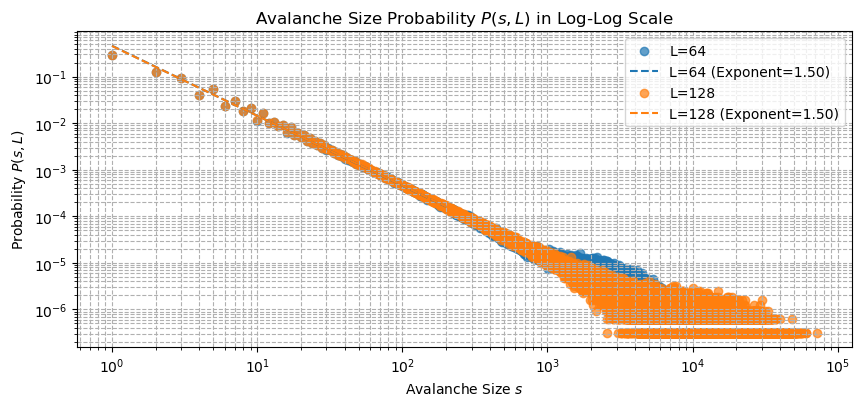

In [859]:
L = 64
T = 5000000

# Simulations for different system sizes
L_values = [64,128]
avalanche_data = [oslo_model(L, T) for L in L_values]

# Compute and plot probabilities
avalanche_probability(avalanche_data, L_values, 'big')

In [860]:
# # avalanche_simulation.py
# import logging


# def compute_avalanches(L, T):
#     try:
#         # Example avalanche computation logic (replace with your actual model)
#         print(f"Computing avalanche for L={L}, T={T}")
#         return L * T  # Replace with your actual computation logic
#     except Exception as e:
#         print(f"Error with L={L}: {e}")
#         return []


# def avalanche_probability(data, sizes, model):
#     print(f"Computing avalanche probability for model {model}...")
#     for L, data_item in zip(sizes, data):
#         print(f"System size L={L}: {data_item}")

In [861]:
# import logging
# import multiprocessing
# import concurrent.futures
# from functools import partial# Import the module

# # Set the start method for multiprocessing (necessary in Jupyter notebooks)
# multiprocessing.set_start_method('spawn', force=True)

# # Function to run simulations


# def run_simulations():
#     L_values = [64, 128, 256, 1000]  # Example system sizes
#     T = 500000  # Example parameter for simulation

#     # Set up logging for debugging
#     logging.basicConfig(level=logging.DEBUG)

#     try:
#         # Use partial to fix T and pass L to the compute function
#         compute_with_T = partial(compute_avalanches, T=T)

#         # Run the simulations in parallel using ProcessPoolExecutor
#         with concurrent.futures.ProcessPoolExecutor() as executor:
#             avalanche_data = list(executor.map(compute_with_T, L_values))

#         # Output the results
#         print("Simulation results:", avalanche_data)

#         # Analyze the results (replace with actual analysis code)
#         avalanche_probability(
#             avalanche_data, L_values, 'big')

#     except Exception as e:
#         logging.error(f"An error occurred while running the simulations: {e}")


# # This should be placed at the top level for multiprocessing
# if __name__ == '__main__':
#     run_simulations()

Do you observe power law behavior in the avalanche size distribution?

#### ANSWER: Yes, I observe a power law behavior in the avalanche size distribution for the Oslo model, once the system has reached self-organized criticality (SOC).

Why does this power law break for large s?

#### ANSWER: The power law breaks down for large s because of finite system size (limited number of sites), saturation of the system, statistical sampling limitations, and time constraints. The probability of very large avalanches is reduced, leading to a cutoff in the distribution.